In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Carga Datos

In [6]:
data = pd.read_csv('titanic.csv')

print(str(data.shape) + '\n')
data.head()

(891, 12)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Analisis de Datos para toma de decisiones en FE Pipeline

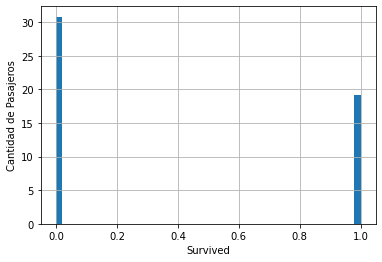

In [9]:
data['Survived'].hist(bins=50, density=True)
plt.xlabel("Survived")
plt.ylabel("Cantidad de Pasajeros")
plt.show()

#### 2.1 Verificamos tipos de variables en X

In [13]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
#cantidad e variables categoricas
len(cat_vars)

5

In [14]:
data[cat_vars].dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [15]:
#agregamos el caso especial ya que por definicion esta variables es categorica
cat_vars = cat_vars + ['Survived']

In [16]:
data[cat_vars].dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Survived     int64
dtype: object

In [17]:
cat_vars = cat_vars + ['Pclass']

In [19]:
data[cat_vars].dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Survived     int64
Pclass       int64
dtype: object

In [20]:
# Variables numericas

num_vars = [var for var in data.columns if (var not in cat_vars and var !='Survived')]

In [21]:
data[num_vars].dtypes

PassengerId      int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

#### 2.2 Analisis de valores faltantes

In [22]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum()>0)]
len(var_with_na)

3

In [23]:
#proporcion de NAs en cada variable
data[var_with_na].isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

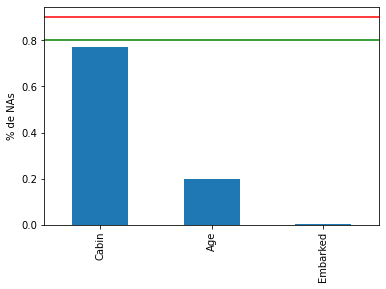

In [24]:
#graficamos % de NAs
data[var_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("% de NAs")
plt.axhline(y=0.9, color="r")
plt.axhline(y=0.8, color="g")

In [30]:
#variables categoricas con NAs
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Cabin', 'Embarked']

In [31]:
#variables numericas con NAs
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Age']

In [28]:
print ("Cantidad de variables numericas con NAs.{}". format(len(num_na)))
print ("Cantidad de variables categoricas con NAs.{}". format(len(cat_na)))

Cantidad de variables numericas con NAs.1
Cantidad de variables categoricas con NAs.2


### 2.2.1 Verificaciòn del impacto del NA contra el target (Survived)

In [33]:
df = data.copy()
var = 'Cabin'
df[var] = np.where(df[var].isnull(), 1,0)
temp = df.groupby(var)["Survived"].agg(['mean', 'std'])
temp

,mean,std
Cabin,,
0,0.666667,0.472564
1,0.299854,0.458528


In [35]:
def na_impact_over_target(df,Xvar,Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1,0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title= "Survived")
    plt.show()

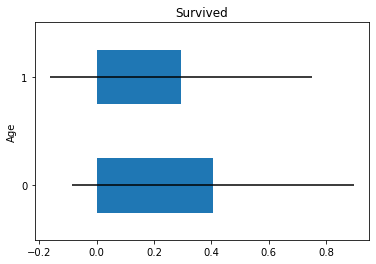

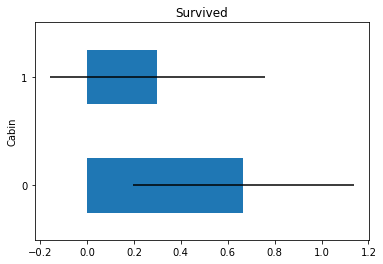

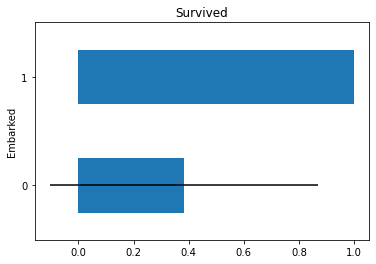

In [36]:
for var in var_with_na:
    na_impact_over_target(data,var,'Survived')